In [ ]:
import numpy as np
import scipy.linalg as la
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg   # SciPy Linear Algebra Library
import plotly.express as px
import seaborn as sns
sns.set_theme(style="ticks")

# Create a covariance suitable matrix (non negative eigenvalues)

In [48]:
s = np.array([23, 15, 4.5, 9.5, 39])

R = np.array([( 1.0, 0.9, 0.5,-0.4,-0.5 ),
              ( 0.9, 1.0, 0.5,-0.4, 0.8),
              ( 0.5, 0.5, 1.0,-0.5, 0.5),
              (-0.4,-0.4,-0.5, 1.0, 0.5),
              (-0.5, 0.8, 0.5, 0.5, 1.0)])

S_cov = np.dot(np.dot(np.diag(s),R),np.diag(s))
S_cov

array([[ 529.   ,  310.5  ,   51.75 ,  -87.4  , -448.5  ],
       [ 310.5  ,  225.   ,   33.75 ,  -57.   ,  468.   ],
       [  51.75 ,   33.75 ,   20.25 ,  -21.375,   87.75 ],
       [ -87.4  ,  -57.   ,  -21.375,   90.25 ,  185.25 ],
       [-448.5  ,  468.   ,   87.75 ,  185.25 , 1521.   ]])

In [49]:
if 1 == 0:
  p = 15
  a=1
  while a>0:
    S = np.zeros((p,p)) # initialize covariance matrix
    d = np.diag_indices(p) #  
    S[d] = np.random.uniform(-100,100,p)
    S[np.triu_indices(p, k=1)] = np.random.uniform(-100,100, p*2)
    S[np.tril_indices(p, k=-1)] = S[np.triu_indices(p, k=1)]
    eigen_values = np.linalg.eigvals(S)
    a = len(eigen_values[eigen_values<0])
    #print(a)
    #print('Eigenvalues', eiagen_values)

  print(S)

# Create correlated random variables with the covariance matrix

[[66.3101844   0.          0.        ]
 [40.44358558 60.92235735  0.        ]
 [23.44464643 17.87806648 90.2695159 ]]
Z shape: (1000, 3)
S shape: (3, 3)
Y shape: (1000, 3)
Sy shape: (3, 3)
Correlation marix of Z
array([[ 1.        ,  0.04456382,  0.06940511],
       [ 0.04456382,  1.        , -0.02023508],
       [ 0.06940511, -0.02023508,  1.        ]])
Correlation marix of Y
array([[1.        , 0.5967609 , 0.33336811],
       [0.5967609 , 1.        , 0.26762402],
       [0.33336811, 0.26762402, 1.        ]])
Actual covariance matrix
[[6604.93973737 3023.66837342 2448.77788099]
 [3023.66837342 3886.85849045 1508.0487142 ]
 [2448.77788099 1508.0487142  8169.24332221]]
Desired covariance matrix
[[4397.04055542 2681.82161793 1554.6188282 ]
 [2681.82161793 5347.21723942 2037.35951905]
 [1554.6188282  2037.35951905 9017.86220741]]
Difference 
[[0.502133   0.12746812 0.57516289]
 [0.12746812 0.27310631 0.25980236]
 [0.57516289 0.25980236 0.09410422]]


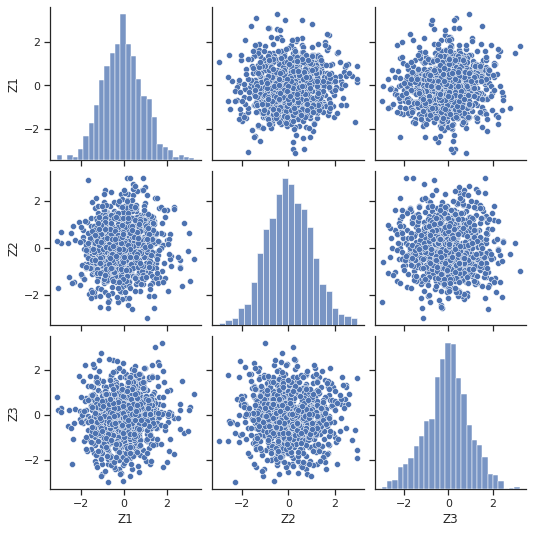

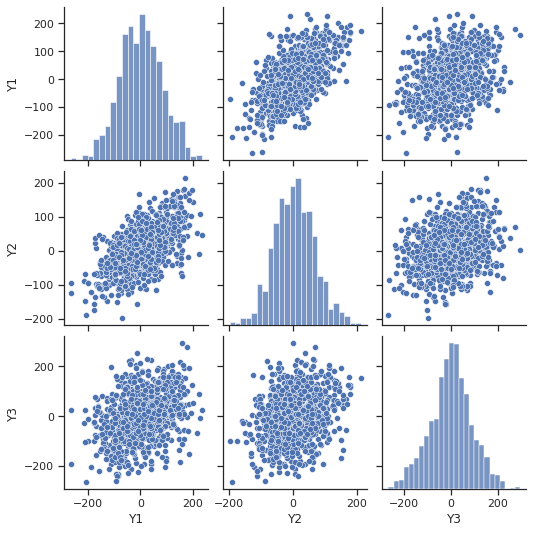

In [ ]:

#S = np.array(((19.33404047,  24.86875095, -13.64177494),
#            ( 24.86875095,  74.1783959,  -32.76089662),
#            (-13.64177494, -32.76089662,  39.68168545)))



m = 1000
p=3
Z = np.random.normal(0, 1, (m, p))



sns.pairplot(pd.DataFrame(data=Z, columns=['Z1','Z2','Z3']))#

L = scipy.linalg.cholesky(S, lower=True)
#L = scipy.linalg.cholesky(R, lower=True)

print(L)

mu = 5
Y = np.dot(Z,L)  + mu
Ry = np.corrcoef(Y.T)
Sy = np.cov(Y.T)



print('Z shape:', np.shape(Z))
#np.shape(Sp)
print('S shape:',np.shape(S))
print('Y shape:',np.shape(Y))
print('Sy shape:',np.shape(Sy))
print('Correlation marix of Z')
pprint.pprint(np.corrcoef(Z.T))
print('Correlation marix of Y')
pprint.pprint(Ry)
print('Actual covariance matrix')
print(Sy)
print('Desired covariance matrix')
print(S)
print('Difference ')
print(abs(S-Sy)/S)

#plt.figure(figsize=(12,8))
#ax = plt.subplot(2,2,1)
#ax.scatter(np.arange(0,len(Y)), Y[:,0], color='black', label='1', marker = 'o')
#ax = plt.subplot(2,2,2)
#ax.scatter(np.arange(0,len(Y)),Y[:,1],color='black', label='2', marker = 'o')
#ax = plt.subplot(2,2,3)
#ax.scatter(np.arange(0,len(Y)),Y[:,2],color='black', label='3', marker = 'o')
#ax = plt.subplot(2,2,4)
#ax.scatter(np.arange(0,len(Y)),Y[:,3],color='black', label='4', marker = 'o')
#plt.show()

#fig = px.scatter_matrix(pd.DataFrame(data=Y, columns=['1','2','3','4']))
#fig.show()

pd.DataFrame(data=Y).describe()
sns.pairplot(pd.DataFrame(data=Y, columns=['Y1','Y2','Y3']))

# Withening

                0
count  100.000000
mean     0.100435
std      1.082561
min     -2.663198
25%     -0.686193
50%      0.056259
75%      1.058020
max      2.579675


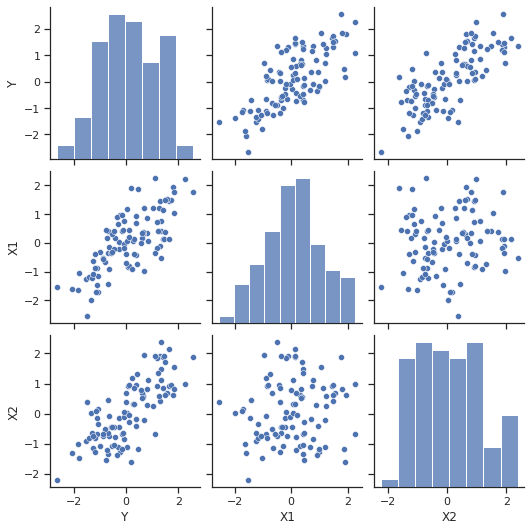

In [ ]:
p = 4
m = 100
np.random.seed(0)

X1 = np.random.normal(0,1,(m,1))
X2 = np.random.normal(0,1,(m,1))

ro = 0.7

Y1 = ro*X1 + X2*np.sqrt(1-ro**2)

Y = np.concatenate([Y1, X1, X2], axis=1)

#df = pd.DataFrame()

print(pd.DataFrame(data=Y1).describe())

sns.pairplot(pd.DataFrame(data=Y, columns=['Y','X1','X2']))

